In [1]:
import pandas as pd

In [3]:
dataset=pd.read_csv("50_Startups.csv")

In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [7]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [9]:
dependent=dataset[['Profit']]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [147]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_features=None)
regressor=regressor.fit(x_train,y_train)

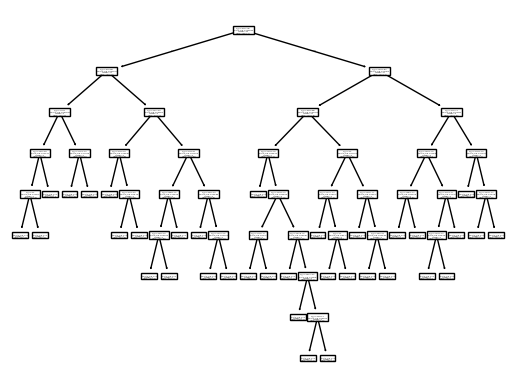

In [149]:
#to display how the tree is built
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [151]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.9519037125469694

In [153]:
import pickle
filename="finalized_model_DT.sav"
pickle.dump(regressor,open(filename,'wb'))

In [155]:
loaded_model=pickle.load(open("finalized_model_DT.sav",'rb'))
result=loaded_model.predict([[345,432,267,0,1]])
result

C:\Users\keert\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([35673.41])